In [15]:
# Data processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from tensorflow.keras.datasets import mnist

# Tree Visualization
import matplotlib.pyplot as plt
import seaborn as sn

Dataset split: 60000 train rows 60000 test rows
Dataset split: 10000 train rows 10000 test rows


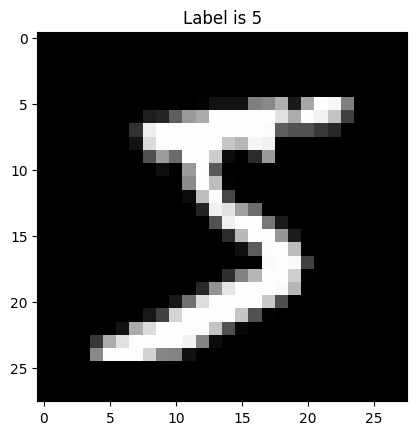

In [16]:
# Initialize
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# digits = load_digits()
print(f"Dataset split: {len(x_train)} train rows",
          f"{len(y_train)} test rows")

print(f"Dataset split: {len(x_test)} train rows",
          f"{len(y_test)} test rows")

point = np.array(x_train[0], dtype='uint8')
point = point.reshape((28, 28))

plt.title('Label is {label}'.format(label=y_train[0]))
plt.imshow(point, cmap='gray')
plt.show()

In [17]:
# Add outliers
df = pd.DataFrame()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [18]:
# normalize data
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

# x train
nsamples, nx, ny = x_train.shape
x_train = x_train.reshape((nsamples, nx * ny))

# x test
nsamples, nx, ny = x_test.shape
x_test = x_test.reshape((nsamples, nx * ny))

In [19]:
# prepare Poly model and RBF model
poly_model = svm.SVC(kernel='poly', degree=10, C=1, coef0=1.5, decision_function_shape='ovo')
rbf_model = svm.SVC(kernel='rbf', gamma='scale', C=0.3)

poly_fit = poly_model.fit(x_train, y_train)
rbf_fit = rbf_model.fit(x_train, y_train)

In [6]:
# predict
poly_predict = poly_model.predict(x_test)
rbf_predict = rbf_model.predict(x_test)

In [7]:
# decision function
poly_df = rbf_model.decision_function(x_test)
rbf_df = rbf_model.decision_function(x_test)

In [10]:
print(poly_df)
print(rbf_df)

[[ 3.81544682 -0.30216248  6.1768478  ...  9.31646206  2.75282154
   7.28130224]
 [ 4.21110586  2.87689481  9.31196223 ... -0.31247376  5.2763123
   1.69237387]
 [-0.30618193  9.30916856  7.24099949 ...  8.25663786  6.25300049
   1.74392131]
 ...
 [ 0.69481438 -0.3046506   2.71751987 ...  6.25927528  7.29847194
   8.30249569]
 [ 3.7636103   2.76014087  2.7305718  ... -0.2915689   8.3000681
   0.71651561]
 [ 7.24070795 -0.30328201  8.29329718 ...  0.6981858   3.78507518
   2.72913913]]
[[ 3.81544682 -0.30216248  6.1768478  ...  9.31646206  2.75282154
   7.28130224]
 [ 4.21110586  2.87689481  9.31196223 ... -0.31247376  5.2763123
   1.69237387]
 [-0.30618193  9.30916856  7.24099949 ...  8.25663786  6.25300049
   1.74392131]
 ...
 [ 0.69481438 -0.3046506   2.71751987 ...  6.25927528  7.29847194
   8.30249569]
 [ 3.7636103   2.76014087  2.7305718  ... -0.2915689   8.3000681
   0.71651561]
 [ 7.24070795 -0.30328201  8.29329718 ...  0.6981858   3.78507518
   2.72913913]]


In [11]:
# accuracy Polynomial Kernel
poly_accuracy = accuracy_score(y_test, poly_predict)
poly_f1 = f1_score(y_test, poly_predict, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy * 100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1 * 100))

Accuracy (Polynomial Kernel):  98.05
F1 (Polynomial Kernel):  98.05


In [12]:
# accuracy RBF Kernel
rbf_accuracy = accuracy_score(y_test, rbf_predict)
rbf_f1 = f1_score(y_test, rbf_predict, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy * 100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1 * 100))


Accuracy (RBF Kernel):  97.18
F1 (RBF Kernel):  97.18


In [13]:
# preparing Confusion Matrix and DataFrame Polynomial Kernel
cm = confusion_matrix(y_test, poly_predict)

poly_df = pd.DataFrame(cm, index=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

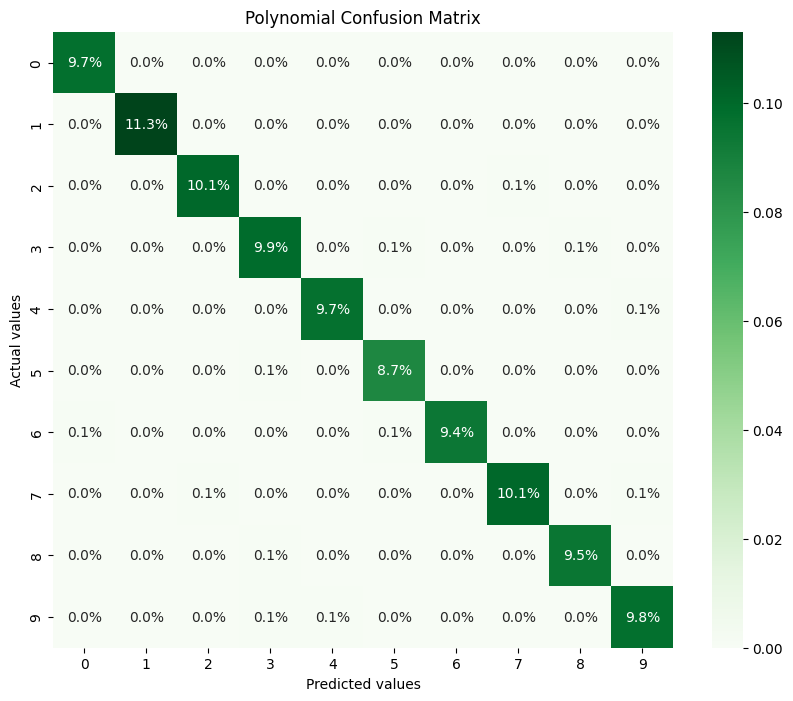

In [14]:
# plotting Confusion matrix RBF Kernel
plt.figure(figsize=(10,8))
sn.heatmap(poly_df/np.sum(cm), annot=True, fmt='.1%', cmap='Greens')
plt.title('Polynomial Confusion Matrix')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [15]:
# preparing Confusion Matrix and DataFrame RBF Kernel
cm = confusion_matrix(y_test, rbf_predict)

rbf_df = pd.DataFrame(cm, index=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

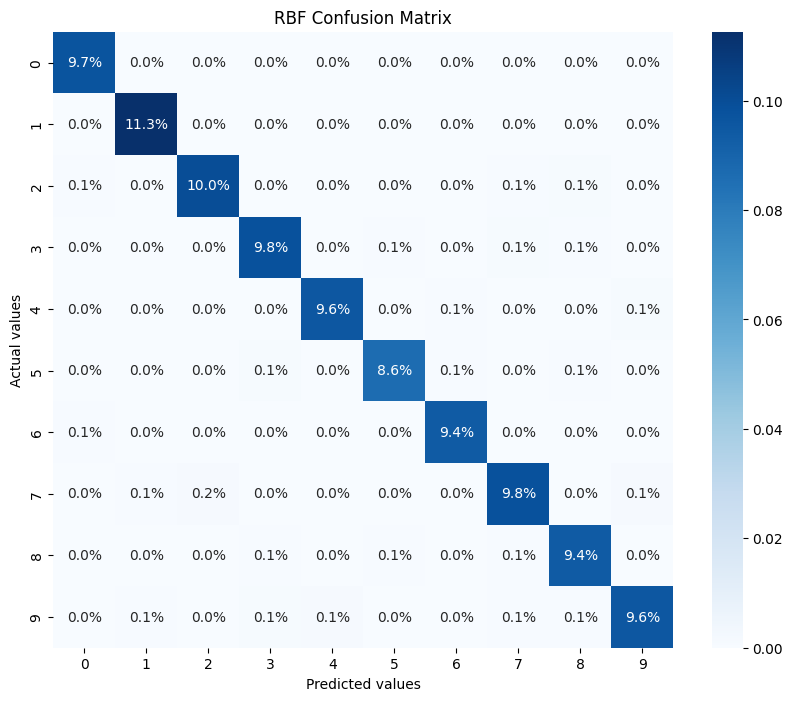

In [16]:
# plotting Confusion matrix RBF Kernel
plt.figure(figsize=(10,8))
sn.heatmap(rbf_df/np.sum(cm), annot=True, fmt='.1%', cmap='Blues')
plt.title('RBF Confusion Matrix')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [13]:
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma='auto')

In [26]:
clf.fit(x_train)

OneClassSVM(gamma='auto', nu=0.1)

In [27]:
y_pred_test = clf.predict(x_test)
print(y_pred_test)

[ 1 -1  1 ...  1  1  1]


In [29]:
n_error_test = y_pred_test[y_pred_test == -1].size
print(n_error_test)

965


In [30]:
df['labels'] = y_test
df['scores'] = clf.decision_function(x_test)
df['anomalies'] = clf.predict(x_test)
df['score_samples'] = clf.score_samples(x_test)
df.head(10)

,labels,scores,anomalies,score_samples
0,7,58.800762,1,5076.807968
1,2,-26.086461,-1,4991.920746
2,1,70.427597,1,5088.434803
3,0,79.936066,1,5097.943272
4,4,89.045085,1,5107.052292
5,1,62.028421,1,5080.035627
6,4,64.805438,1,5082.812644
7,9,45.825105,1,5063.832311
8,5,18.510081,1,5036.517287
9,9,47.100895,1,5065.108102


In [33]:
# Get the scores for the testing dataset
score = clf.score_samples(x_test)
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]
# # Check the prediction performance
print(classification_report(y_test, customized_prediction))

The customized score threshold for 2% of outliers is 4970.60
              precision    recall  f1-score   support

           0       0.09      0.95      0.17       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.09     10000
   macro avg       0.01      0.09      0.02     10000
weighted avg       0.01      0.09      0.02     10000



c:\Users\zippe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zippe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zippe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [34]:
# Count how many anomalies
anomalies = df.loc[df['anomalies'] == -1]
anomaly_index = list(anomalies.index)
total_outliers = len(df.loc[df['scores'] < 0])
print(anomaly_index)
print(anomalies)

[1, 18, 25, 54, 60, 79, 183, 200, 209, 222, 236, 246, 287, 305, 311, 338, 352, 360, 380, 405, 410, 412, 437, 440, 461, 462, 475, 477, 492, 493, 503, 513, 524, 549, 556, 559, 602, 611, 612, 625, 648, 651, 654, 656, 665, 677, 684, 701, 710, 719, 720, 736, 737, 766, 792, 796, 799, 822, 864, 869, 876, 877, 894, 923, 937, 945, 972, 991, 997, 1003, 1017, 1049, 1060, 1069, 1101, 1102, 1119, 1145, 1147, 1162, 1170, 1174, 1223, 1253, 1263, 1291, 1337, 1348, 1352, 1362, 1377, 1379, 1386, 1391, 1419, 1431, 1457, 1463, 1499, 1526, 1529, 1530, 1536, 1545, 1567, 1569, 1574, 1589, 1609, 1610, 1618, 1623, 1654, 1671, 1672, 1679, 1692, 1712, 1720, 1733, 1734, 1737, 1747, 1748, 1749, 1790, 1793, 1800, 1801, 1808, 1840, 1854, 1857, 1859, 1870, 1882, 1892, 1895, 1896, 1940, 2044, 2048, 2060, 2072, 2091, 2107, 2110, 2140, 2145, 2151, 2161, 2170, 2184, 2201, 2215, 2220, 2229, 2240, 2256, 2291, 2293, 2300, 2304, 2319, 2329, 2337, 2338, 2353, 2354, 2363, 2371, 2375, 2376, 2400, 2408, 2436, 2462, 2464, 2465, 2

In [37]:
# accuracy
print("Accuracy")
print(list(df['anomalies']).count(-1))
print(total_outliers)
percentage = 100 * list(df['anomalies']).count(-1) / (total_outliers)
print(percentage)

Accuracy
965
965
100.0


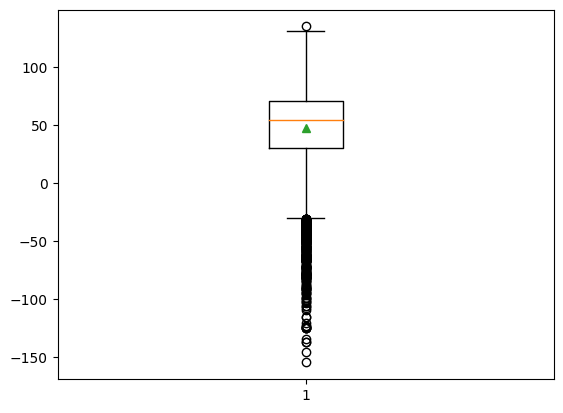

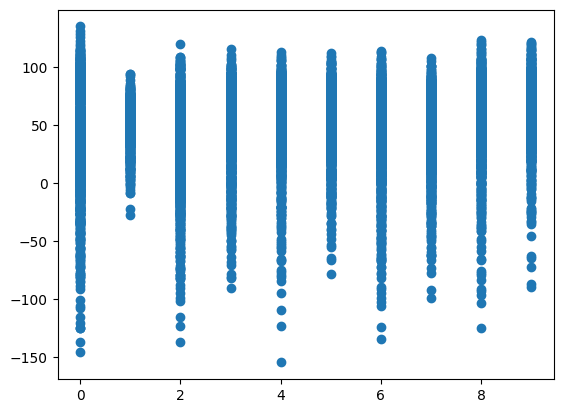

In [38]:
plt.boxplot(df['scores'], showmeans=True, showfliers=True)
plt.show()

plt.scatter(df['labels'], df['scores'])
plt.show()